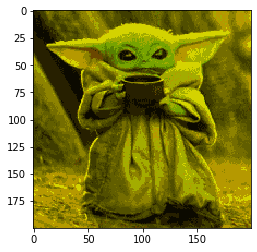

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
# %matplotlib inline

img = image.imread('imageSmall.png') #img is a (800, 800, 3) nparray.
# plt.imshow(img)
# plt.show()

k = 16 #number of clustets
num_iter = 5 #number of iterations

img2d = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])) #reshaping the image to 2D
m, n = img2d.shape

#centroids:
centroids = np.zeros((k, n)) # = for 16 colors 
for i in range(k): 
    centroids[i, 0] = img2d[np.random.randint(0 ,m), 0] # *255: to change it to rgb color values
    centroids[i, 1] = img2d[np.random.randint(0 ,m), 1]
#     centroids[i, 2] = img2d[np.random.randint(0 ,m), 2]
    
    
#euclidean distance:
def distance(x1, y1, x2, y2):
    dist= np.square(x1-x2) + np.square(y1-y2)
    dist = np.sqrt(dist)
    return dist
    
    
#k-means:
for iteration in range(num_iter):
    
    index_matrix = np.array([])
    flag = 0
    for j in range(m):

        min_dist = 1000 #just a big value!
        for i in range(k):
            if(distance(img2d[j, 0], img2d[j, 1], centroids[i, 0], centroids[i, 1]) < min_dist):
                min_dist = distance(img2d[j, 0], img2d[j, 1], centroids[i, 0], centroids[i, 1])
                flag = i
            else:
                continue
        index_matrix = np.append(index_matrix, flag) 

        
    #updating the centroids:
    for i in range(k):

        sum_x = 0
        sum_y = 0
        count = 0
        for j in range(m):
            if(index_matrix[j]==i):
                sum_x += img2d[j, 0]
                sum_y += img2d[j, 1]
                count += 1

        if(count == 0):
            count = 1
        centroids[i, 0] = sum_x/count
        centroids[i, 1] = sum_y/count


        
img_compress = centroids[index_matrix.astype(int), :]
img_compress = np.reshape(img_compress, (img.shape[0], img.shape[1], img.shape[2]))

plt.imshow(img_compress)
plt.show()


In [2]:
plt.savefig('img_compress.png')

<Figure size 432x288 with 0 Axes>

In [3]:
index_matrix.astype(int)

array([13, 13,  7, ...,  1,  1,  1])

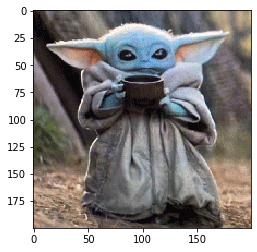

In [4]:
plt.imshow(img)